In [15]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [16]:
from util.structs import DataCluster, Dataset, Measurement
from util import mymath, csv_table, graph, graph_fit
import numpy as np

In [17]:
L = Measurement(36, "1%") * 1e-3
R_L = Measurement(9.5, "1%")
U_E = Measurement(0.384, "1%");

In [18]:
table = csv_table.read("./data/234j");
header = table[0]
print(header)
table_data = table[1:]
data = DataCluster()

for row in table_data:
    data.add(Dataset({
        "f": Measurement(float(row[0]), "1%"),
        "U_C": Measurement(float(row[1]), "1%") * 1e-3,
    }))

print(data)

['f [Hz]' ' U_C [mV]']
U_C              | f               
-----------------+-----------------
(360.0 ± 3.6)e-3 | (100.0 ± 1.0)e-1
(396.0 ± 4.0)e-3 | (100.0 ± 1.0)   
(453.0 ± 4.5)e-3 | (250.0 ± 2.5)   
(615.0 ± 6.2)e-3 | (400.0 ± 4.0)   
(728.0 ± 7.3)e-3 | (450.0 ± 4.5)   
(914.0 ± 9.1)e-3 | (500.0 ± 5.0)   
(126.9 ± 1.3)e-2 | (550.0 ± 5.5)   
(159.5 ± 1.6)e-2 | (575.0 ± 5.8)   
(215.8 ± 2.2)e-2 | (600.0 ± 6.0)   
(250.6 ± 2.5)e-2 | (610.0 ± 6.1)   
(297.1 ± 3.0)e-2 | (620.0 ± 6.2)   
(359.0 ± 3.6)e-2 | (630.0 ± 6.3)   
(396.2 ± 4.0)e-2 | (635.0 ± 6.3)   
(435.7 ± 4.4)e-2 | (640.0 ± 6.4)   
(474.6 ± 4.7)e-2 | (645.0 ± 6.5)   
(506.3 ± 5.1)e-2 | (650.0 ± 6.5)   
(523.7 ± 5.2)e-2 | (656.0 ± 6.6)   
(518.4 ± 5.2)e-2 | (660.0 ± 6.6)   
(494.1 ± 4.9)e-2 | (665.0 ± 6.7)   
(457.0 ± 4.6)e-2 | (670.0 ± 6.7)   
(415.0 ± 4.2)e-2 | (675.0 ± 6.8)   
(373.8 ± 3.7)e-2 | (680.0 ± 6.8)   
(303.1 ± 3.0)e-2 | (690.0 ± 6.9)   
(249.8 ± 2.5)e-2 | (700.0 ± 7.0)   
(167.9 ± 1.7)e-2 | (725.0 ± 7.2)   
(123.

In [19]:
for d in data:
    d["A"] = d["U_C"] / U_E;

print(data)

A                | U_C              | f               
-----------------+------------------+-----------------
( 93.8 ± 1.3)e-2 | (360.0 ± 3.6)e-3 | (100.0 ± 1.0)e-1
(103.1 ± 1.5)e-2 | (396.0 ± 4.0)e-3 | (100.0 ± 1.0)   
(118.0 ± 1.7)e-2 | (453.0 ± 4.5)e-3 | (250.0 ± 2.5)   
(160.2 ± 2.3)e-2 | (615.0 ± 6.2)e-3 | (400.0 ± 4.0)   
(189.6 ± 2.7)e-2 | (728.0 ± 7.3)e-3 | (450.0 ± 4.5)   
(238.0 ± 3.4)e-2 | (914.0 ± 9.1)e-3 | (500.0 ± 5.0)   
(330.5 ± 4.7)e-2 | (126.9 ± 1.3)e-2 | (550.0 ± 5.5)   
(415.4 ± 5.9)e-2 | (159.5 ± 1.6)e-2 | (575.0 ± 5.8)   
(562.0 ± 7.9)e-2 | (215.8 ± 2.2)e-2 | (600.0 ± 6.0)   
(652.6 ± 9.2)e-2 | (250.6 ± 2.5)e-2 | (610.0 ± 6.1)   
( 77.4 ± 1.1)e-1 | (297.1 ± 3.0)e-2 | (620.0 ± 6.2)   
( 93.5 ± 1.3)e-1 | (359.0 ± 3.6)e-2 | (630.0 ± 6.3)   
(103.2 ± 1.5)e-1 | (396.2 ± 4.0)e-2 | (635.0 ± 6.3)   
(113.5 ± 1.6)e-1 | (435.7 ± 4.4)e-2 | (640.0 ± 6.4)   
(123.6 ± 1.7)e-1 | (474.6 ± 4.7)e-2 | (645.0 ± 6.5)   
(131.8 ± 1.9)e-1 | (506.3 ± 5.1)e-2 | (650.0 ± 6.5)   
(136.4 ± 1

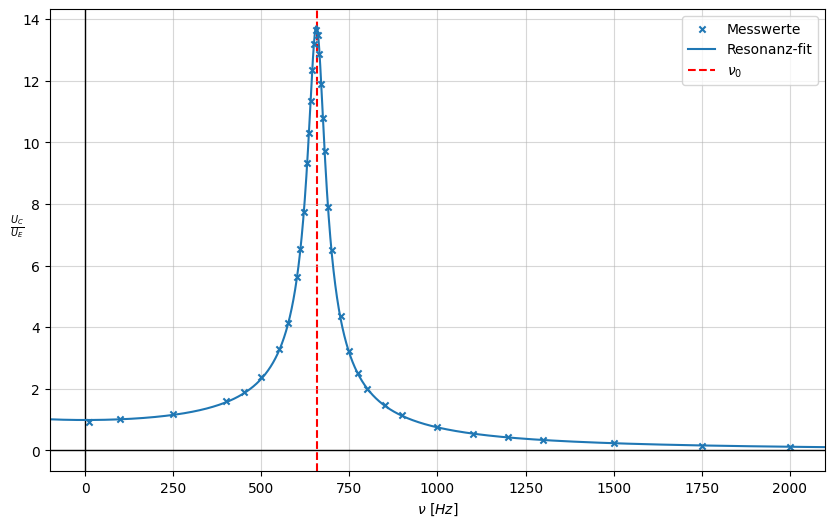

In [20]:
plot = graph.create_plot(figsize=(10, 6));
fig, ax = plot;

ax.set_axisbelow(True);
ax.grid(alpha=.5);

ax.set_xlabel(r"$\nu~[Hz]$")
ax.set_ylabel(r"$\frac{U_C}{U_E}$", rotation=0)
ax.axhline(0, color="black", linewidth=1)
ax.axvline(0, color="black", linewidth=1)

graph.scatter_data(data, "f", "A", plot=plot, with_error=False, s=20, marker="x", label="Messwerte")
res = graph_fit.ResonanceCurve.on_data(data, "f", "A")
# graph.plot_func(res.func, plot=plot, label="Resonanz-fit", change_viewport=False)
graph.plot_func(res.value_func, plot=plot, label="Resonanz-fit", change_viewport=False)

ax.axvline(res.params["x0"].value, color="red", linestyle="--", zorder=0, label=r"$\nu_0$")

ax.legend()

fig.savefig("./output/plot_234j.pdf", dpi=500)

In [21]:
print(res.params)

a: (426.8 ± 1.3)e+3, x0: (6571.9 ± 1.9)e-1, beta: (-235.9 ± 1.6)e-1


In [22]:
U_A_0 = res.func(0)
U_A_max = res.func(res.params["x0"])
print(U_A_0)
print(U_A_max)

Q_1 = U_A_max / U_A_0

(988.3 ± 3.0)e-3
(137.7 ± 1.0)e-1


In [23]:
L = Measurement(36, .4) * 1e-3;
C = Measurement(1.5, "1%") * 1e-6;

omega_0 = (1 / (L* C))**.5
print(omega_0)

(430.3 ± 3.2)e+1


In [24]:
from util import function_analysis

maxi = 1 / 2**0.5 * U_A_max
x = function_analysis.find_x_for_y(res.value_func, maxi, (0, 1000))
print(x)
diff = x[1] - x[0]
print(diff)
omega_d = 2 * np.pi * diff;
print(omega_d)

[632.2675625134561, 679.5642862404038]
47.296723726947675
297.17407959888976


In [25]:
Q_2 = Measurement(4303, 32) / Measurement(297, 5)
print(Q_2)

(144.9 ± 2.7)e-1


In [26]:
omega_max = omega_0 * (1 - (1 / (2 * Q_2)**2))**.5

print(omega_max)
print(omega_max / 2 / np.pi)

(430.1 ± 3.2)e+1
(684.5 ± 5.1)


In [27]:
maxis = function_analysis.find_max(res.value_func, (0, 1000))
print(maxis);
print(maxis[0] * 2 * np.pi)

(np.float64(656.3420926263575), np.float64(13.776518112588791))
4123.918992873432


In [28]:
print(Measurement(685, 6) / Measurement(656, 3))

(104.4 ± 1.0)e-2


In [29]:
Q_mean = mymath.error_weighted_mean([Q_1, Q_2])
print(Q_mean)

(140.2 ± 1.0)e-1


In [30]:

Q_theo = omega_0 * L / R_L
print(Q_theo)

(163.1 ± 2.7)e-1


In [31]:
print(Q_mean / Q_theo)

( 85.9 ± 1.6)e-2


In [33]:
print(omega_0)
print(C)
print(1 / omega_0**2 / C)

(430.3 ± 3.2)e+1
(150.0 ± 1.5)e-8
(360.0 ± 6.5)e-4
